In [11]:
#Importing all the required libraries
import numpy as np
import random as python_random
import tensorflow
import keras


#Loading the IMDB Data

In [12]:
!pip install keras_preprocessing
from keras.datasets import imdb
from keras import preprocessing

from keras_preprocessing.sequence import pad_sequences

sample_features = 10000 #Validating on 10,000 samples
wordlength = 150 # Cuttingoff reviews after 150 words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = sample_features)

#Restricting training samples to 100
x_train = x_train[:100]
y_train = y_train[:100]

x_train = pad_sequences(x_train, maxlen=wordlength)
x_test = pad_sequences(x_test, maxlen=wordlength)

In [15]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense


In [16]:
#Building the basic embedded model with Training sample - 100

model = Sequential()

# Specifying the max input length to the Embedding layer
model.add(Embedding(10000, 8, input_length=wordlength))
model.add(Flatten())

#  Compiling the Model
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Running the Model
Embedded_model = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 1s 152ms/step - loss: 0.6924 - acc: 0.4625 - val_loss: 0.6932 - val_acc: 0.5500
Epoch 2/10
3/3 [==============================] - 0s 122ms/step - loss: 0.6679 - acc: 0.9250 - val_loss: 0.6921 - val_acc: 0.6500
Epoch 3/10
3/3 [====

Ploating the Accuracy and loss for above results

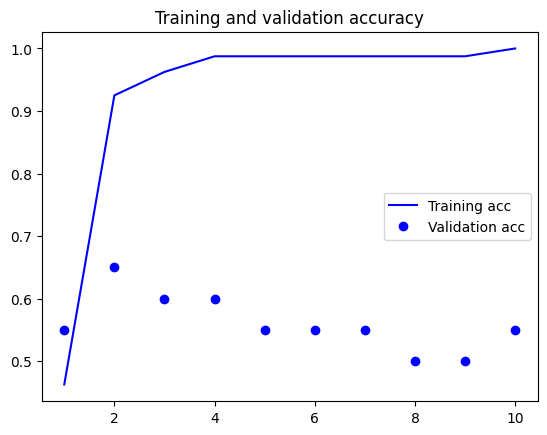

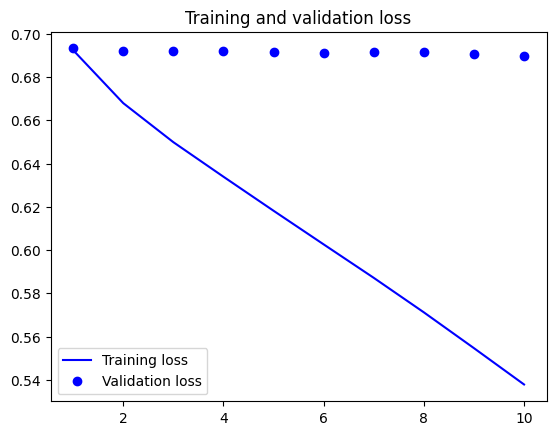

In [19]:
# Plotting Training and Validation accuracy
# Plotting Training and Validation loss
import matplotlib.pyplot as plt

acc = Embedded_model.history['acc']
val_acc = Embedded_model.history['val_acc']
loss = Embedded_model.history['loss']
val_loss = Embedded_model.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'bo', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



#Pretrained word embeddings on IMDB Data:

In [20]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  6257k      0  0:00:13  0:00:13 --:--:-- 12.0M


In [21]:
!rm -r aclImdb/train/unsup


In [25]:
import os

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


In [26]:
print('No. of Samples', len(texts))

No. of Samples 25000


Tokenizing the texts:

In [34]:
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing. sequence import pad_sequences
import numpy as np
from keras import preprocessing
from keras_preprocessing.sequence import pad_sequences

maxlen = 150 # cutting off reviews after 100 words
training_samples = 100 # Training on 100 samples
validation_samples = 10000 # Validating 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

# Splitting the data into training and validation set:

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [35]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-11-29 15:59:35--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-29 15:59:35--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-29 15:59:35--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [37]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")

Found 400000 word vectors.


Preparing the GloVe word-embeddings matrix:

In [30]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

Building the model:

In [31]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 15000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                480032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
#Training and Evaluating the Model
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy", # in a multiclass problem categorical_crossentropy would be used
              metrics = ["acc"])
history = model.fit(x_train, y_train,epochs = 10,batch_size = 32,validation_data = (x_val, y_val))
model.save_weights("pre_trained_glove_model.h5")

Epoch 1/10
7/7 [==============================] - 2s 126ms/step - loss: 2.1500 - acc: 0.4950 - val_loss: 0.6929 - val_acc: 0.5163
Epoch 2/10
7/7 [==============================] - 1s 103ms/step - loss: 0.5729 - acc: 0.7500 - val_loss: 0.8932 - val_acc: 0.5020
Epoch 3/10
7/7 [==============================] - 1s 110ms/step - loss: 0.6146 - acc: 0.7000 - val_loss: 1.7872 - val_acc: 0.4983
Epoch 4/10
7/7 [==============================] - 1s 113ms/step - loss: 0.6178 - acc: 0.7550 - val_loss: 0.7174 - val_acc: 0.5413
Epoch 5/10
7/7 [==============================] - 1s 109ms/step - loss: 0.2364 - acc: 0.9200 - val_loss: 0.7955 - val_acc: 0.5196
Epoch 6/10
7/7 [==============================] - 1s 110ms/step - loss: 0.1338 - acc: 0.9950 - val_loss: 0.7906 - val_acc: 0.5440
Epoch 7/10
7/7 [==============================] - 1s 113ms/step - loss: 0.1468 - acc: 0.9550 - val_loss: 2.1203 - val_acc: 0.4981
Epoch 8/10
7/7 [==============================] - 1s 111ms/step - loss: 0.0935 - acc: 0.96

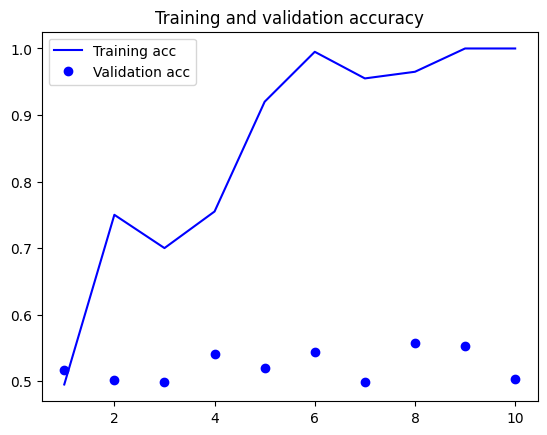

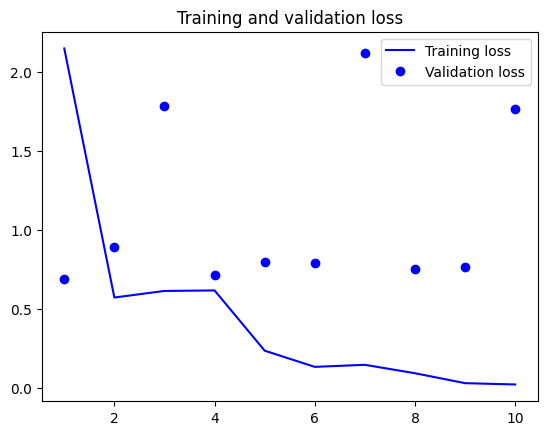

In [33]:
#Plotting the Results

import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label = "Training acc")
plt.plot(epochs, val_acc, "bo", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label = "Training loss")
plt.plot(epochs, val_loss, "bo", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Loading the IMDB Data:

In [38]:
!pip install keras_preprocessing
from keras.datasets import imdb
from keras import preprocessing

from keras_preprocessing.sequence import pad_sequences

max_features = 10000
maxlen = 150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words =max_features)

#Restricting training samples to 200

x_train = x_train[:200]
y_train = y_train[:200]


x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [39]:
#Building the basic embedded model with Training sample - 200

from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen))

model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_3 (Flatten)         (None, 1200)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
Embedded_model2 = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
13/13 [==============================] - 1s 58ms/step - loss: 0.4424 - acc: 0.9725 - val_loss: 0.6679 - val_acc: 0.6500
Epoch 2/10
13/13 [==============================] - 1s 72ms/step - loss: 0.4080 - acc: 0.9750 - val_loss: 0.6654 - val_acc: 0.6400
Epoch 3/10
13/13 [==============================] - 1s 55ms/step - loss: 0.3733 - acc: 0.9800 - val_loss: 0.6627 - val_acc: 0.6300
Epoch 4/10
13/13 [==============================] - 1s 59ms/step - loss: 0.3389 - acc: 0.9800 - val_loss: 0.6595 - val_acc: 0.6300
Epoch 5/10
13/13 [==============================] - 1s 60ms/step - loss: 0.3059 - acc: 0.9800 - val_loss: 0.6568 - val_acc: 0.6300
Epoch 6/10
13/13 [==============================] - 1s 71ms/step - loss: 0.2738 - acc: 0.9875 - val_loss: 0.6539 - val_acc: 0.6500
Epoch 7/10
13/13 [==============================] - 1s 74ms/step - loss: 0.2434 - acc: 0.9900 - val_loss: 0.6516 - val_acc: 0.6500
Epoch 8/10
13/13 [==============================] - 1s 77ms/step - loss: 0.2151 - a

Plotting the accuracy and loss for the above results:

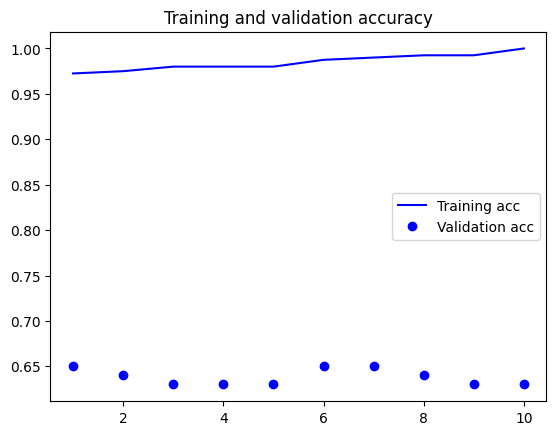

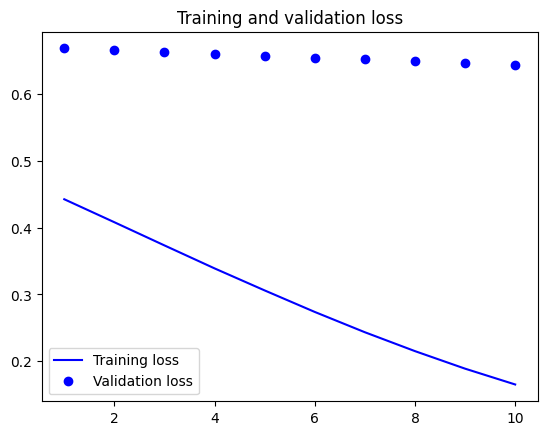

In [11]:
import matplotlib.pyplot as plt

acc = Embedded_model2.history["acc"] # Training accuracy
val_acc = Embedded_model2.history["val_acc"] # Validation accuracy
loss = Embedded_model2.history["loss"] # Training loss
val_loss = Embedded_model2.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label = "Training acc")
plt.plot(epochs, val_acc, "bo", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "b", label = "Training loss")
plt.plot(epochs, val_loss, "bo", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Pretrained word embeddings on IMDB Data:

In [43]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  3489k      0  0:00:23  0:00:23 --:--:-- 5088k


In [44]:
!rm -r aclImdb/train/unsup

In [48]:
import os

imdb_dir = "/content/aclImdb"
train_dir = os.path.join(imdb_dir, "test")


labels = []
texts = []

for label_type in ["neg", "pos"]:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname [-4:] == ".txt":
            #f = open(os.path.join(dir_name, fname))
            # using code above gave: UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 194: character maps to <undefined>
            # added: encoding='utf-8'
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == "neg":
                labels.append(0)
            else:
                labels.append(1)


In [49]:
print('No. of Samples', len(texts))

No. of Samples 25000


Tokenizing the texts:

In [50]:
from keras.preprocessing.text import Tokenizer
import numpy as np
from keras import preprocessing

from keras_preprocessing.sequence import pad_sequences

maxlen = 150 # cuts off review after 100 words
training_samples = 200 # Trains on 200 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [52]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-11-29 16:39:25--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-29 16:39:26--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-29 16:39:26--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

gl

In [56]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("found %s word vectors." % len (embeddings_index))


found 400000 word vectors.


Preparing the GloVe word-embeddings matrix:

In [57]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

Building the model:

In [58]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 15000)             0         
                                                                 
 dense_5 (Dense)             (None, 32)                480032    
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
#Training and Evaluating the Model
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy", # in a multiclass problem categorical_crossentropy would be used
              metrics = ["acc"])
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))
model.save_weights("pre_trained_glove_model.h5")

Epoch 1/10
7/7 [==============================] - 2s 240ms/step - loss: 1.3005 - acc: 0.5550 - val_loss: 1.2556 - val_acc: 0.4972
Epoch 2/10
7/7 [==============================] - 1s 218ms/step - loss: 0.5511 - acc: 0.7650 - val_loss: 0.7228 - val_acc: 0.5102
Epoch 3/10
7/7 [==============================] - 1s 147ms/step - loss: 0.3595 - acc: 0.9200 - val_loss: 2.0225 - val_acc: 0.4972
Epoch 4/10
7/7 [==============================] - 1s 224ms/step - loss: 0.3936 - acc: 0.9200 - val_loss: 1.2191 - val_acc: 0.4993
Epoch 5/10
7/7 [==============================] - 1s 222ms/step - loss: 0.2384 - acc: 0.9400 - val_loss: 0.7156 - val_acc: 0.5592
Epoch 6/10
7/7 [==============================] - 1s 108ms/step - loss: 0.1608 - acc: 0.9950 - val_loss: 0.8048 - val_acc: 0.5214
Epoch 7/10
7/7 [==============================] - 1s 104ms/step - loss: 0.1086 - acc: 1.0000 - val_loss: 0.7911 - val_acc: 0.5241
Epoch 8/10
7/7 [==============================] - 1s 111ms/step - loss: 0.0995 - acc: 0.99

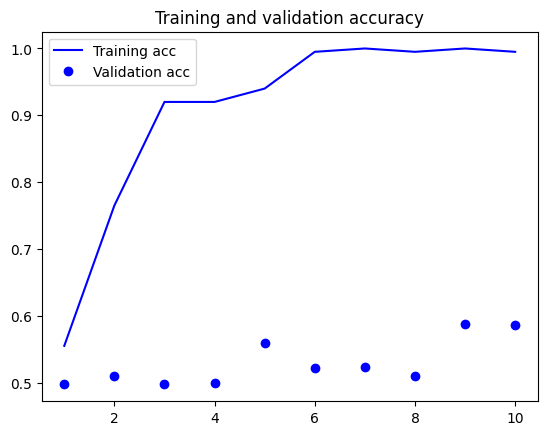

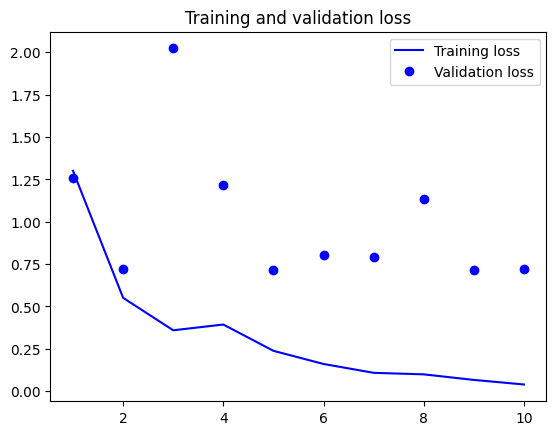

In [61]:
#Plotting the Results
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "b", label = "Training acc")
plt.plot(epochs, val_acc, "bo", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "b", label = "Training loss")
plt.plot(epochs, val_loss, "bo", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Loading the IMDB Data:



In [6]:
!pip install keras_preprocessing
from keras.datasets import imdb
from keras import preprocessing

from keras_preprocessing.sequence import pad_sequences

max_features = 10000
maxlen = 150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words =max_features)

#Restricting training samples to 500

x_train = x_train[:500]
y_train = y_train[:500]


x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [7]:
#Building the basic embedded model with Training sample - 500

from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen))

model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
Embedded_model3 = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
13/13 [==============================] - 6s 432ms/step - loss: 0.6933 - acc: 0.4900 - val_loss: 0.6895 - val_acc: 0.5700
Epoch 2/10
13/13 [==============================] - 2s 147ms/step - loss: 0.6740 - acc: 0.7775 - val_loss: 0.6878 - val_acc: 0.5900
Epoch 3/10
13/13 [==============================] - 1s 103ms/step - loss: 0.6576 - acc: 0.8900 - val_loss: 0.6862 - val_acc: 0.6200
Epoch 4/10
13/13 [==============================] - 1s 104ms/step - loss: 0.6395 - acc: 0.9275 - val_loss: 0.6842 - val_acc: 0.6100
Epoch 5/10
13/13 [==============================] - 1s 113ms/step - loss: 0.6189 - acc: 0.9500 - val_loss: 0.6826 - val_acc: 0.6100
Epoch 6/10
13/13 [==============================] - 1s 84ms/step - loss: 0.5951 - acc: 0.9600 - val_loss: 0.6803 - val_acc: 0.6200
Epoch 7/10
13/13 [==============================] - 1s 93ms/step - loss: 0.5688 - acc: 0.9625 - val_loss: 0.6783 - val_acc: 0.6200
Epoch 8/10
13/13 [==============================] - 1s 84ms/step - loss: 0.540

Plotting the accuracy and loss for the above results:



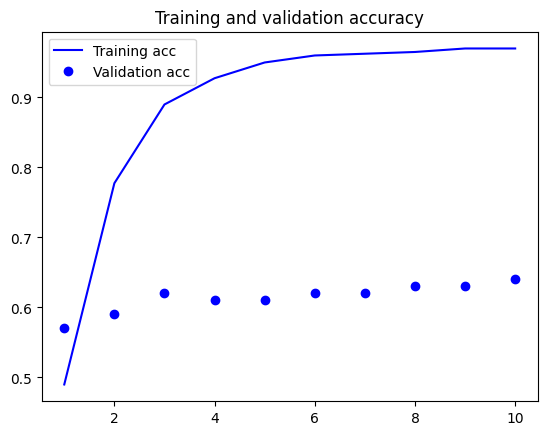

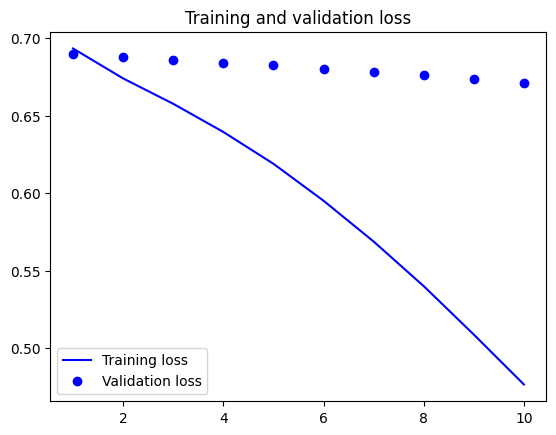

In [12]:
import matplotlib.pyplot as plt

acc = Embedded_model3.history["acc"] # Training accuracy
val_acc = Embedded_model3.history["val_acc"] # Validation accuracy
loss = Embedded_model3.history["loss"] # Training loss
val_loss = Embedded_model3.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label = "Training acc")
plt.plot(epochs, val_acc, "bo", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "b", label = "Training loss")
plt.plot(epochs, val_loss, "bo", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

 Pretrained word embeddings on IMDB Data:

In [13]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  6790k      0  0:00:12  0:00:12 --:--:-- 14.7M


In [14]:
!rm -r aclImdb/train/unsup

In [15]:
import os

imdb_dir = "/content/aclImdb"
train_dir = os.path.join(imdb_dir, "test")


labels = []
texts = []

for label_type in ["neg", "pos"]:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname [-4:] == ".txt":
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == "neg":
                labels.append(0)
            else:
                labels.append(1)

Tokenizing the texts:

In [16]:
from keras.preprocessing.text import Tokenizer
import numpy as np
from keras import preprocessing
from keras_preprocessing.sequence import pad_sequences

maxlen = 150 # cuts off review after 100 words
training_samples = 500 # Trains on 500 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [17]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-11-29 18:29:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-29 18:29:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-29 18:29:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [18]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("found %s word vectors." % len (embeddings_index))


found 400000 word vectors.


Preparing the GloVe word-embeddings matrix:

In [19]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

Building the model:

In [20]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 15000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                480032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
#Training and Evaluating the Model
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["acc"])
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))
model.save_weights("pre_trained_glove_model.h5")

Epoch 1/10
16/16 [==============================] - 3s 113ms/step - loss: 1.5163 - acc: 0.4840 - val_loss: 1.3545 - val_acc: 0.5032
Epoch 2/10
16/16 [==============================] - 1s 91ms/step - loss: 0.7127 - acc: 0.6580 - val_loss: 1.2553 - val_acc: 0.5007
Epoch 3/10
16/16 [==============================] - 1s 92ms/step - loss: 0.4667 - acc: 0.7820 - val_loss: 0.8155 - val_acc: 0.5351
Epoch 4/10
16/16 [==============================] - 1s 47ms/step - loss: 0.2926 - acc: 0.8840 - val_loss: 0.7846 - val_acc: 0.5544
Epoch 5/10
16/16 [==============================] - 1s 45ms/step - loss: 0.2201 - acc: 0.9280 - val_loss: 1.4495 - val_acc: 0.5043
Epoch 6/10
16/16 [==============================] - 1s 45ms/step - loss: 0.2138 - acc: 0.9200 - val_loss: 0.7914 - val_acc: 0.5858
Epoch 7/10
16/16 [==============================] - 1s 45ms/step - loss: 0.2206 - acc: 0.9260 - val_loss: 0.7587 - val_acc: 0.5989
Epoch 8/10
16/16 [==============================] - 1s 47ms/step - loss: 0.0456 - 

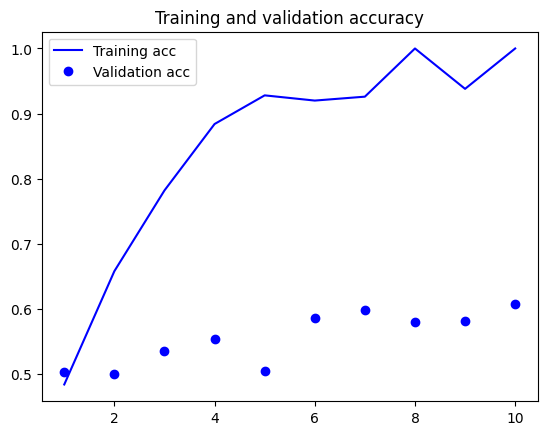

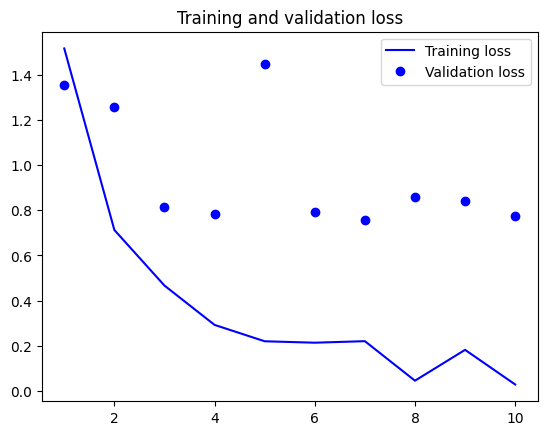

In [22]:
#Plotting the Results
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "b", label = "Training acc")
plt.plot(epochs, val_acc, "bo", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "b", label = "Training loss")
plt.plot(epochs, val_loss, "bo", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Using the model with LSTM (training sample of 6000):

In [2]:
!pip install keras_preprocessing
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras_preprocessing.sequence import pad_sequences


max_features = 10000
maxlen = 150
batch_size = 32

print ("loading data ...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)

input_train = input_train[:6000]
y_train = y_train[:6000]
input_test = input_test[:6000]
y_test = y_test[:6000]

print(len(input_train), "train sequences")
print(len(input_test), "test sequences")


print("Pad sequences (samples x time)")
input_train = pad_sequences(input_train, maxlen=maxlen)
print("input_train shape:", input_train.shape)
print("input_test shape:", input_test.shape)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00
loading data ...
17464789/17464789 [==============================] - 1s 0us/step
6000 train sequences
6000 test sequences
Pad sequences (samples x time)
input_train shape: (6000, 150)
input_test shape: (6000,)


In [3]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["acc"])
LSTM_model = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
38/38 [==============================] - 13s 156ms/step - loss: 0.6922 - acc: 0.5223 - val_loss: 0.6894 - val_acc: 0.5608
Epoch 2/10
38/38 [==============================] - 4s 105ms/step - loss: 0.6573 - acc: 0.6377 - val_loss: 0.5689 - val_acc: 0.7150
Epoch 3/10
38/38 [==============================] - 4s 97ms/step - loss: 0.5027 - acc: 0.7752 - val_loss: 0.5600 - val_acc: 0.7050
Epoch 4/10
38/38 [==============================] - 3s 70ms/step - loss: 0.3966 - acc: 0.8398 - val_loss: 0.4135 - val_acc: 0.8175
Epoch 5/10
38/38 [==============================] - 3s 84ms/step - loss: 0.3134 - acc: 0.8800 - val_loss: 0.3800 - val_acc: 0.8417
Epoch 6/10
38/38 [==============================] - 3s 67ms/step - loss: 0.2524 - acc: 0.9092 - val_loss: 0.4945 - val_acc: 0.7850
Epoch 7/10
38/38 [==============================] - 2s 52ms/step - loss: 0.2035 - acc: 0.9271 - val_loss: 0.6311 - val_acc: 0.7825
Epoch 8/10
38/38 [==============================] - 2s 52ms/step - loss: 0.1648 

We can observe that the LSTM model performs well even with a small dataset.

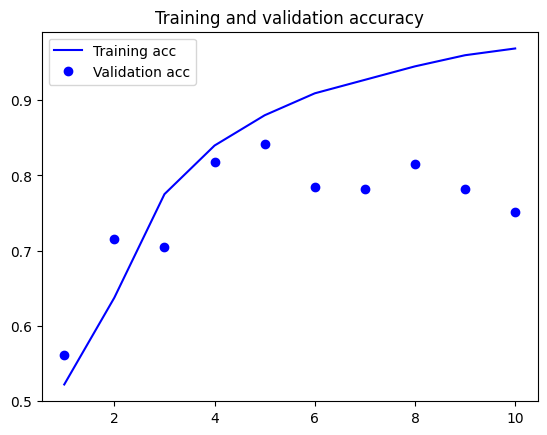

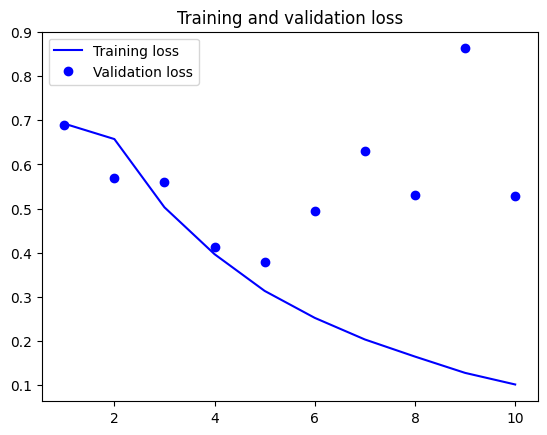

In [5]:
#plotting the results:

import matplotlib.pyplot as plt

acc = LSTM_model.history["acc"] # Training accuracy
val_acc = LSTM_model.history["val_acc"] # Validation accuracy
loss = LSTM_model.history["loss"] # Training loss
val_loss = LSTM_model.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label = "Training acc")
plt.plot(epochs, val_acc, "bo", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "b", label = "Training loss")
plt.plot(epochs, val_loss, "bo", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()